# Basic Statistics in Python

Dataset from Kaggle : **"Pokemon with stats"** by *Alberto Barradas*  
Source: https://www.kaggle.com/abcsds/pokemon (requires login)

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

### Import the Dataset

The dataset is in CSV format; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [2]:
pkmndata = pd.read_csv('pokemonData.csv')
pkmndata.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Description of the dataset, as available on Kaggle, is as follows.
Learn more : https://en.wikipedia.org/wiki/List_of_Pok%C3%A9mon

> **\#** : ID for each Pokemon (runs from 1 to 721)  
> **Name** : Name of each Pokemon  
> **Type 1** : Each Pokemon has a basic Type, this determines weakness/resistance to attacks  
> **Type 2** : Some Pokemons are dual type and have a Type 2 value (set to nan otherwise)  
> **Total** : Sum of all stats of a Pokemon, a general guide to how strong a Pokemon is  
> **HP** : Hit Points, defines how much damage a Pokemon can withstand before fainting  
> **Attack** : The base modifier for normal attacks by the Pokemon (e.g., scratch, punch etc.)  
> **Defense** : The base damage resistance of the Pokemon against normal attacks  
> **SP Atk** : Special Attack, the base modifier for special attacks (e.g. fire blast, bubble beam)  
> **SP Def** : Special Defense, the base damage resistance against special attacks  
> **Speed** : Determines which Pokemon attacks first each round  
> **Generation** : Each Pokemon belongs to a certain Generation  
> **Legendary** : Legendary Pokemons are powerful, rare, and hard to catch

---

Check the vital statistics of the dataset using the `type` and `shape` attributes.

In [3]:
print("Data type : ", type(pkmndata))
print("Data dims : ", pkmndata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (800, 13)


Check the variables (and their types) in the dataset using the `dtypes` attribute.

In [4]:
print(pkmndata.dtypes)

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


---

### Extract a Single Variable

We will start by analyzing a single variable from the dataset, **HP**.  
This variable tells us defines how much damage a Pokemon can withstand.  
Extract the variable and its associated data as a Pandas `DataFrame`.

In [5]:
hp = pd.DataFrame(pkmndata['HP'])
print("Data type : ", type(hp))
print("Data dims : ", hp.size)
hp.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  800


,HP
0,45
1,60
2,80
3,80
4,39


---

### Uni-Variate Statistics

Check the Summary Statistics of Uni-Variate Series using `describe`.

In [6]:
hp.describe()

,HP
count,800.000000
mean,69.258750
std,25.534669
min,1.000000
25%,50.000000
50%,65.000000
75%,80.000000
max,255.000000


Check the Summary Statistics visually using a standard `boxplot`.

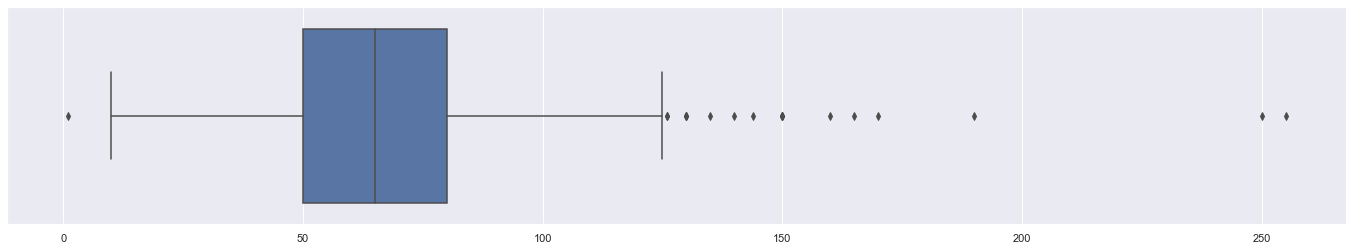

In [26]:
f, axes = plt.subplots(1, 1, figsize=(24, 4))
sb.boxplot(hp, orient = "h")

Extend the summary to visualize the complete distribution of the Series.  
The first visualization is a simple Histogram with automatic bin sizes.

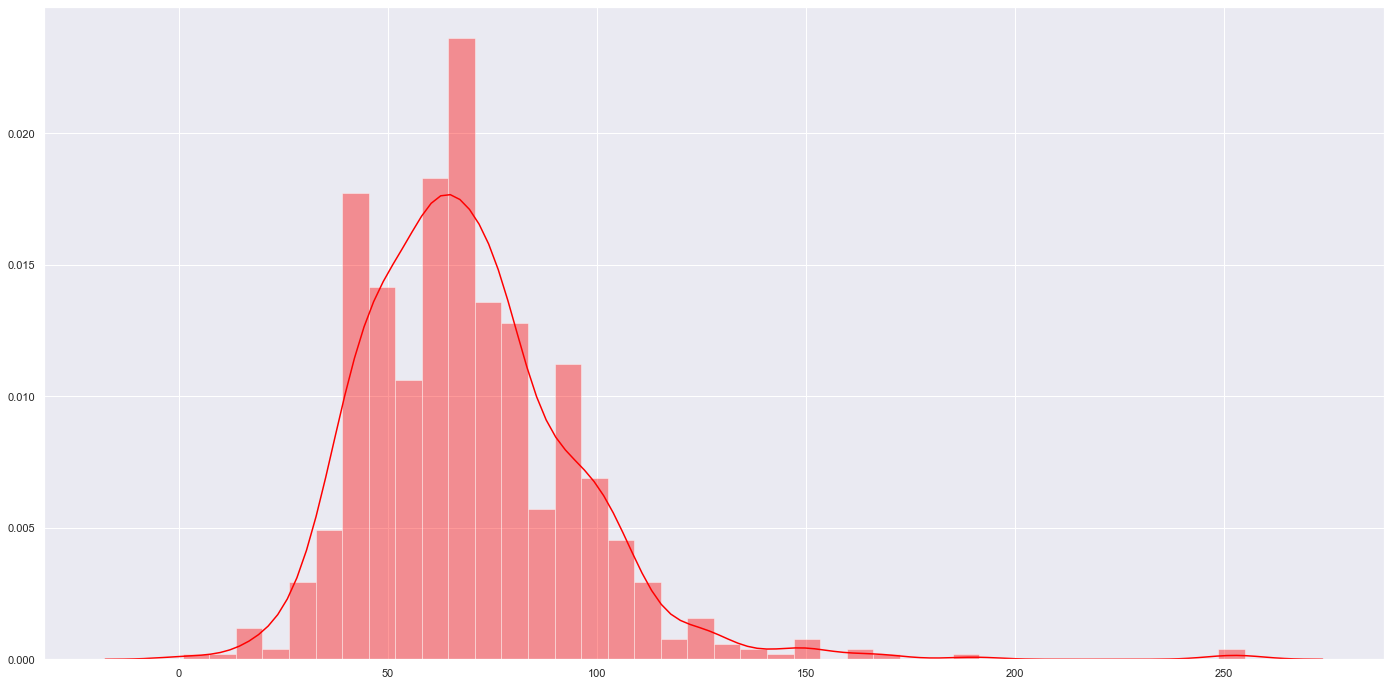

In [27]:
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.distplot(hp, kde = True, color = "red")

The second visualization is a simple Kernel Density Estimate (KDE).

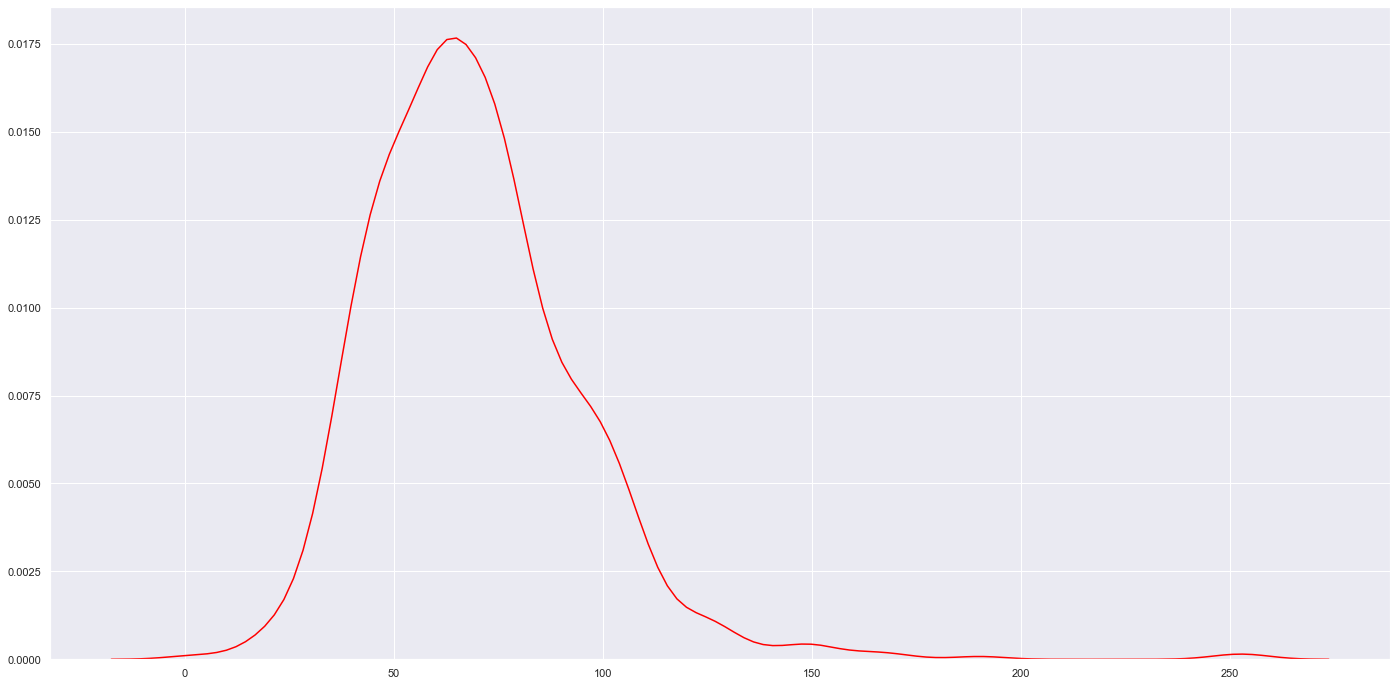

In [9]:
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.distplot(hp, hist = False, color = "red")

The generic `distplot` produces both the Histogram and the KDE.

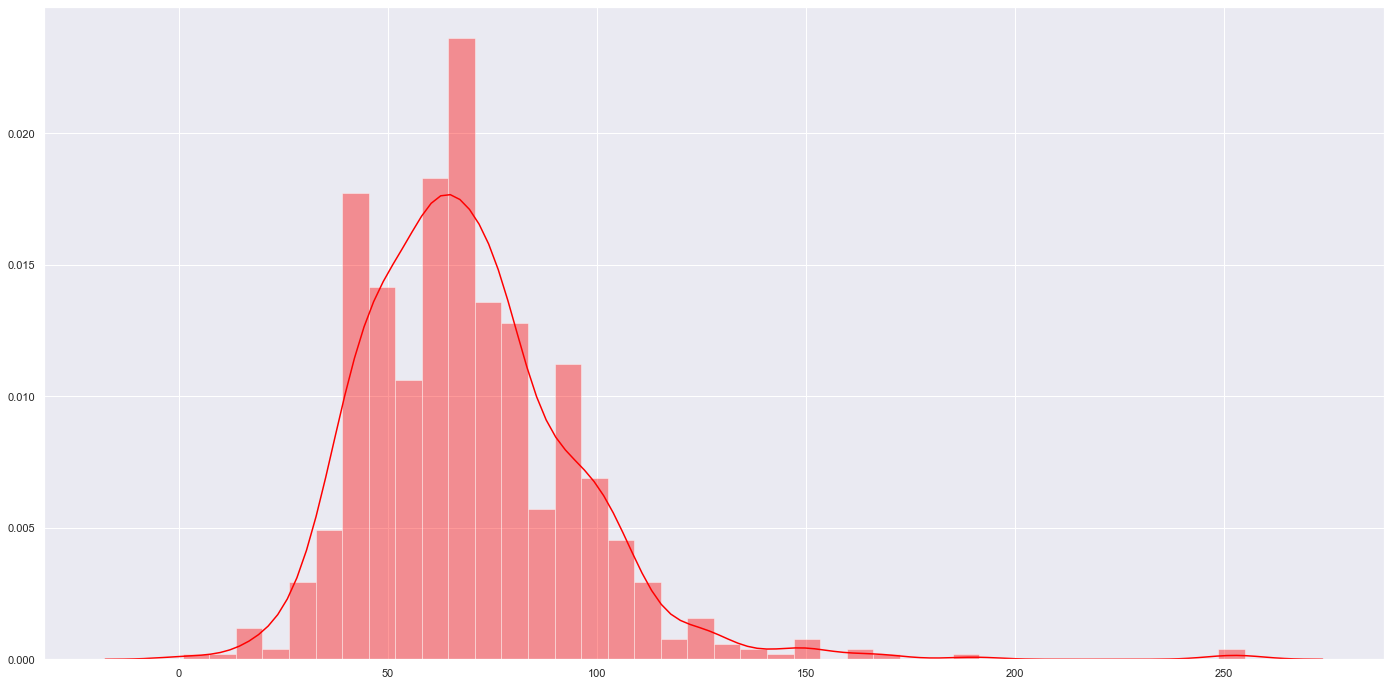

In [10]:
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.distplot(hp, color = "red")

Finally, the **Violin Plot** combines boxplot with kernel density estimate.

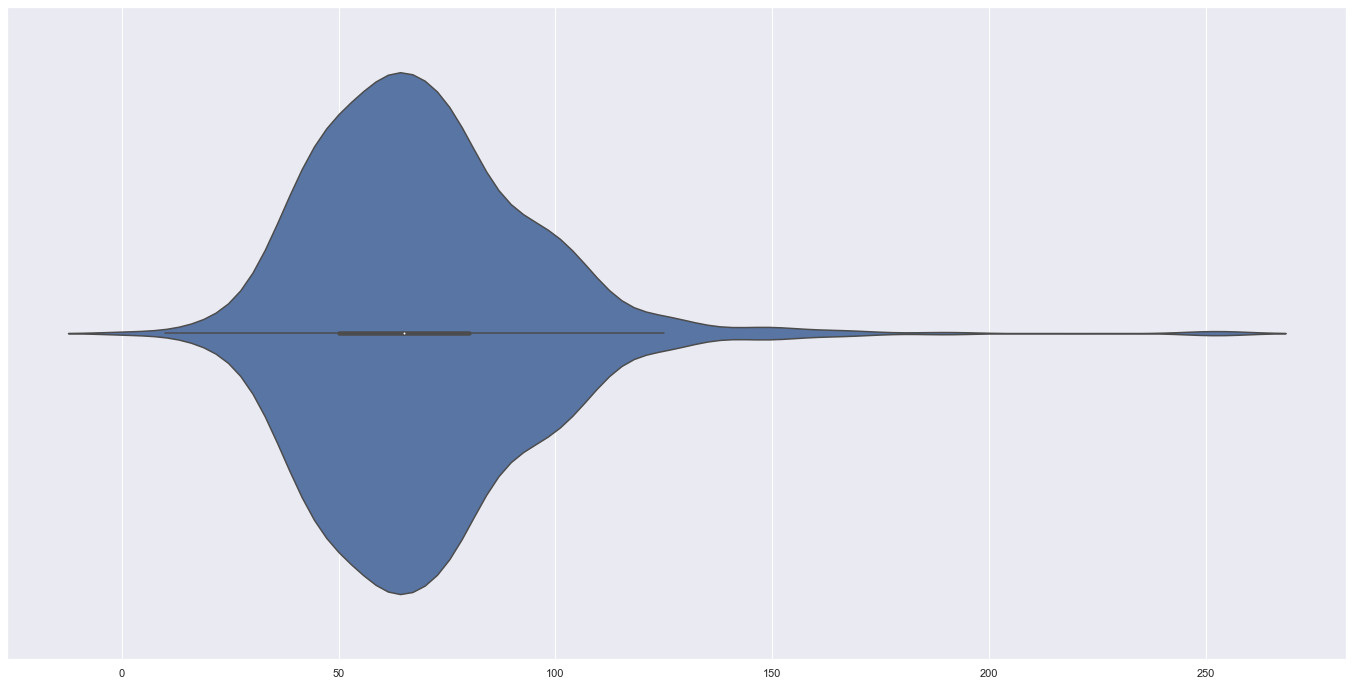

In [11]:
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.violinplot(hp)

---

### Extract Two Variables

Next, we will analyze two variables from the dataset, **HP** vs **Attack**.  
Extract the two variables and their associated data as a Pandas `DataFrame`.

In [12]:
hp = pd.DataFrame(pkmndata['HP'])
attack = pd.DataFrame(pkmndata['Attack'])

---

### Bi-Variate Statistics

We can of course check the uni-variate Summary Statistics for each variable.

In [13]:
# Summary Statisttics for HP
hp.describe()

,HP
count,800.000000
mean,69.258750
std,25.534669
min,1.000000
25%,50.000000
50%,65.000000
75%,80.000000
max,255.000000


In [14]:
# Summary Statisttics for Attack
attack.describe()

,Attack
count,800.000000
mean,79.001250
std,32.457366
min,5.000000
25%,55.000000
50%,75.000000
75%,100.000000
max,190.000000


And visualize the uni-variate Distributions of each variable independently.

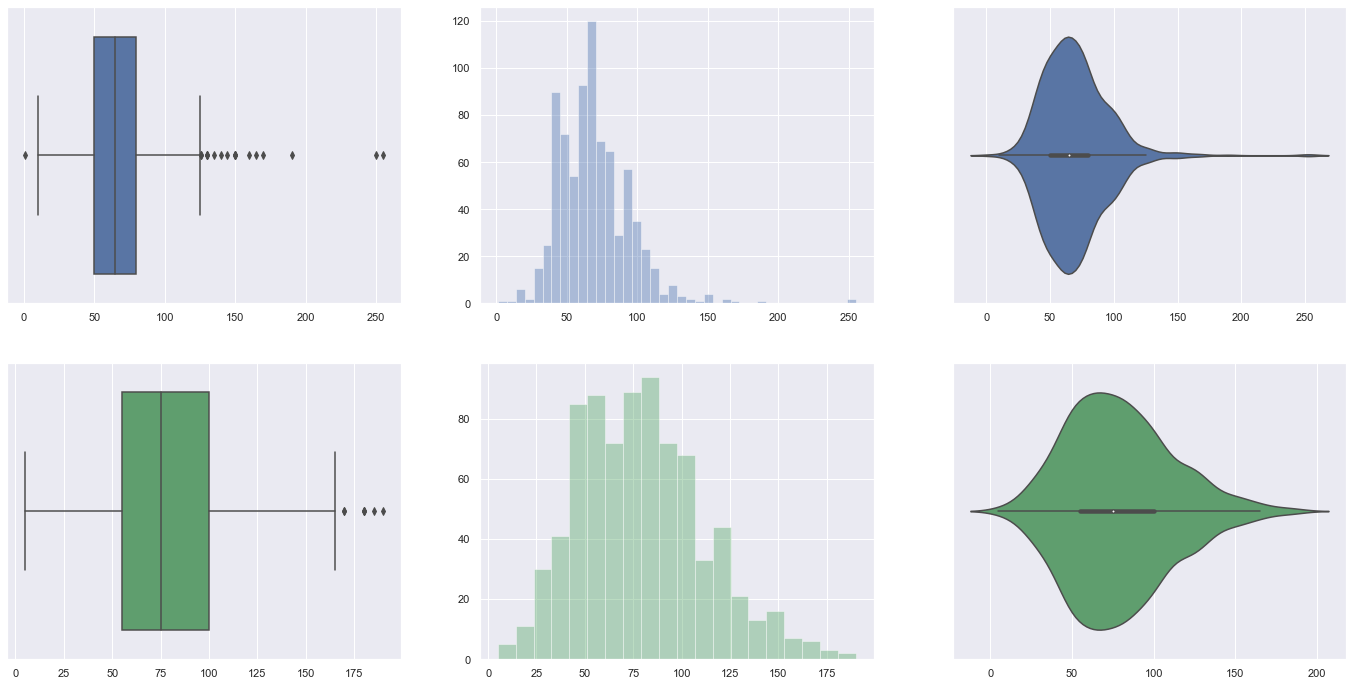

In [15]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP
sb.boxplot(hp, orient = "h", ax = axes[0,0])
sb.distplot(hp, kde = False, ax = axes[0,1])
sb.violinplot(hp, ax = axes[0,2])

# Plot the basic uni-variate figures for Attack
sb.boxplot(attack, orient = "h", ax = axes[1,0], color = 'g')
sb.distplot(attack, kde = False, ax = axes[1,1], color = 'g')
sb.violinplot(attack, ax = axes[1,2], color = 'g')

However, it will be more interesting to visualize them together in a `jointplot`.

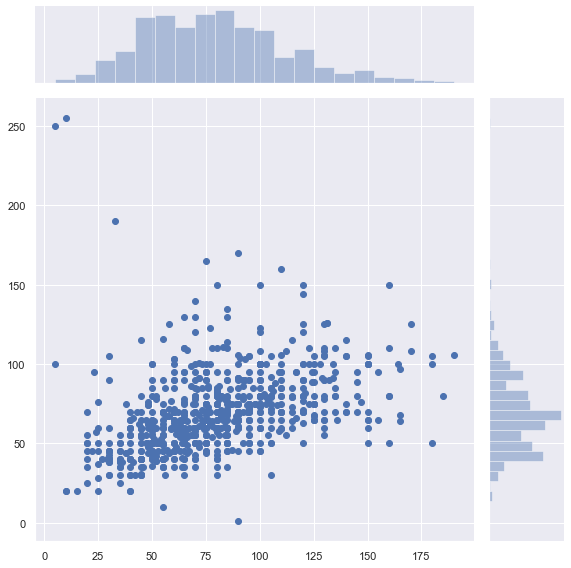

In [16]:
sb.jointplot(x = attack, y = hp, height = 8)

As it tells us something about the **Correlation** between the two variables.

In [17]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([attack, hp], axis = 1, join_axes = [attack.index])

# Calculate the correlation between the two columns/variables
jointDF.corr()

,Attack,HP
Attack,1.000000,0.422386
HP,0.422386,1.000000


One may visualize the correlation matrix as a `heatmap` to gain a better insight.

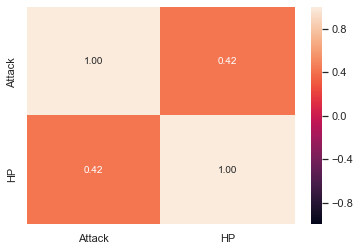

In [18]:
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

---

### Multi-Variate Statistics

Similarly, we may analyze all numeric values in the original dataset.

In [19]:
# Extract only the numeric data variables
numDF = pd.DataFrame(pkmndata[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]])

# Summary Statistics for all Variables
numDF.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


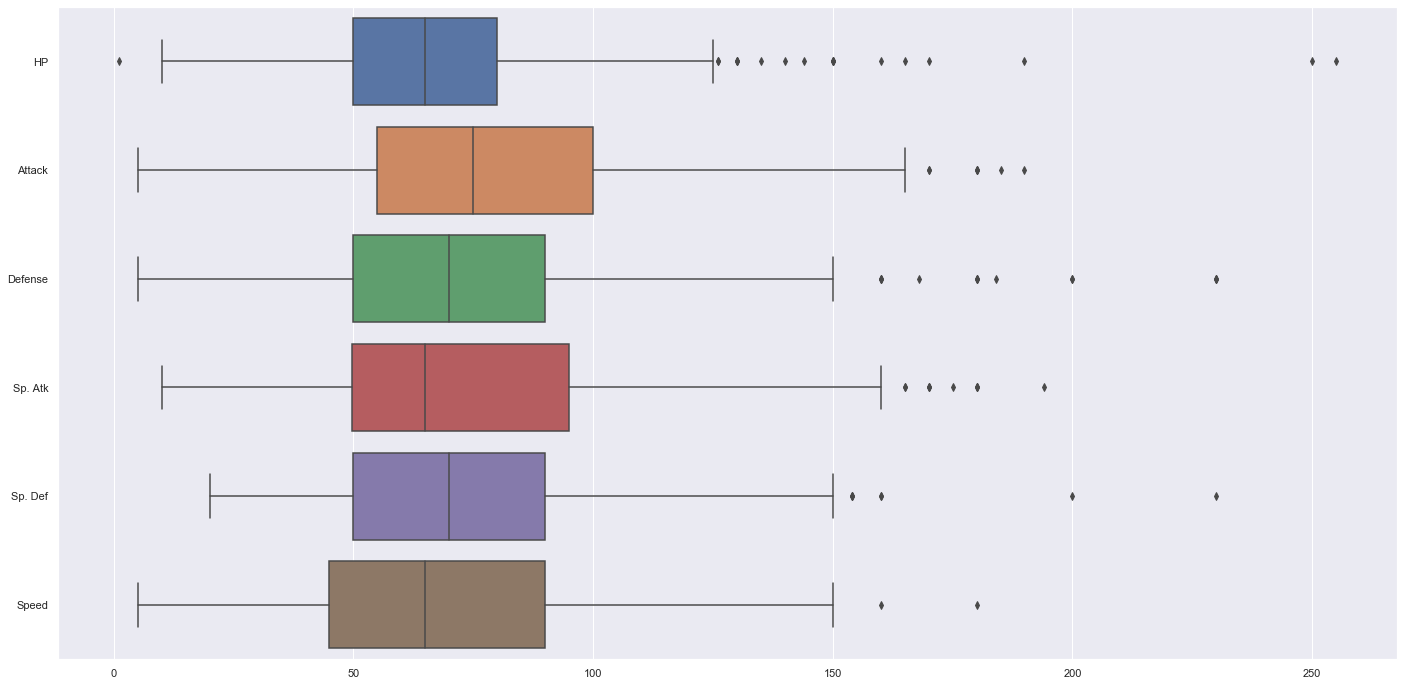

In [20]:
# Draw the Boxplots of all variables
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.boxplot(data = numDF, orient = "h")

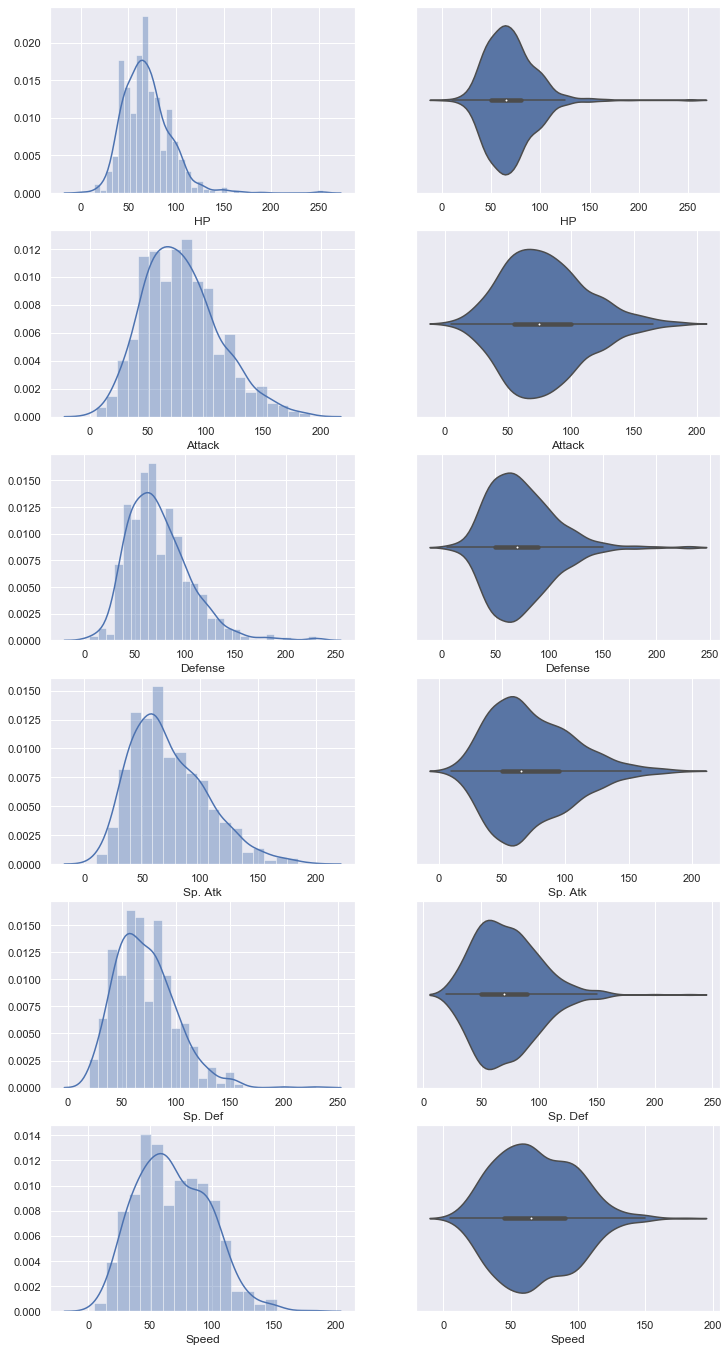

In [21]:
# Draw the distributions of all variables
f, axes = plt.subplots(6, 2, figsize=(12, 24))

count = 0
for var in numDF:
    sb.distplot(numDF[var], ax = axes[count,0])
    sb.violinplot(numDF[var], ax = axes[count,1])
    count += 1

In [22]:
# Calculate the complete  correlation matrix
numDF.corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000


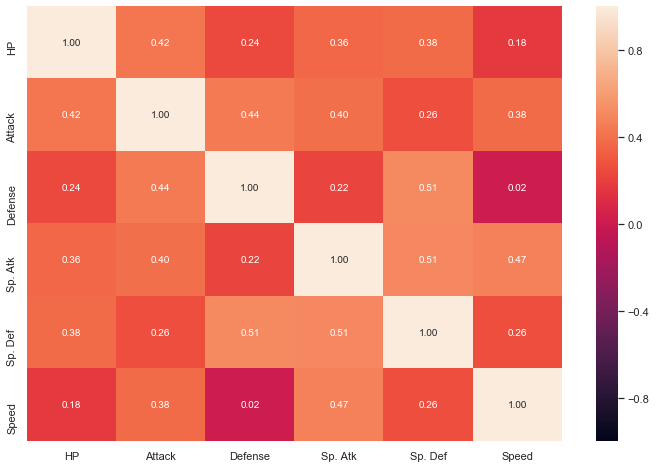

In [23]:
# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(12, 8))
sb.heatmap(numDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

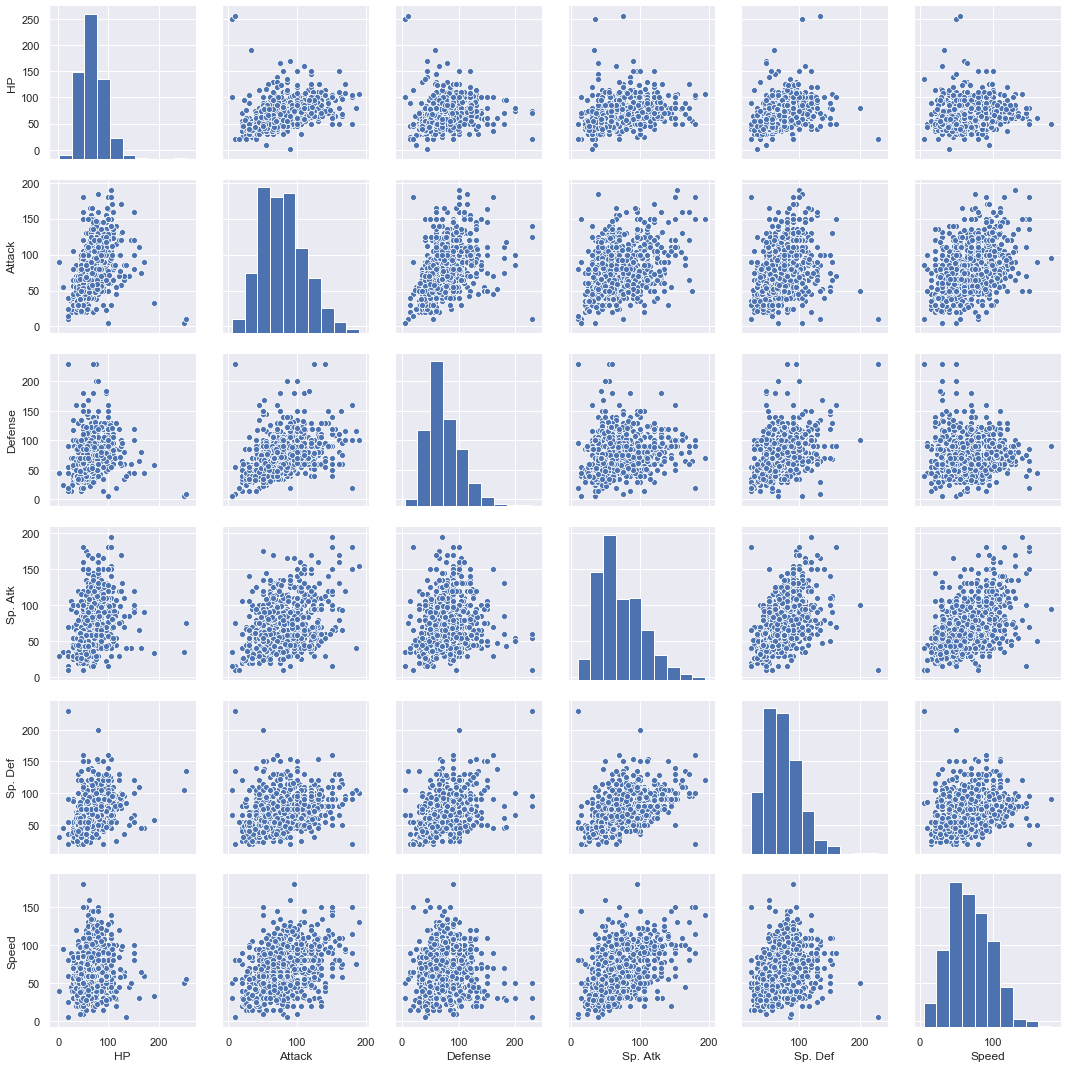

In [24]:
# Draw pairs of variables against one another
sb.pairplot(data = numDF)